# **Goal: 2-layer neural net trained on XOR using backpropagation from scratch.**


# Importing the Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#  ***Backpropagation Formulae Breakdown (with Variable Meanings)***

---

###  Forward Pass:

 $$ z = XW + b $$  
  • `X` → input vector (e.g., [0, 1])  
  • `W` → weight matrix  
  • `b` → bias vector  
  • `z` → weighted sum going into activation  

---
###  Activation Function:

 $$ a = \sigma(z) $$  
  • `σ(z)` → activation function (sigmoid) output  
  • `a` → activation of the neuron

---

###  Loss Function:

 $$ \text{Loss} = \frac{1}{n} \sum (y - \hat{y})^2 $$  
  • `y` → true target values  
  • `ŷ` → predicted output from network  
  • `n` → number of training examples  
  • This is Mean Squared Error (MSE)

---

###  Gradients (Error Signals):

####  Output Layer Delta:

$$ \delta_j = o_j (1 - o_j) (t_j - o_j) $$  
  • `o_j` → output of neuron `j`  
  • `t_j` → target output for neuron `j`  
  • `δ_j` → error signal for output neuron `j`

####  Hidden Layer Delta:

 $$ \delta_j = o_j (1 - o_j) \sum_k w_{jk} \delta_k $$  
  • `o_j` → output from hidden neuron `j`  
  • `w_{jk}` → weight from hidden neuron `j` to output neuron `k`  
  • `δ_k` → delta of the next (output) layer neuron `k`  
  • `δ_j` → backpropagated error signal for hidden neuron `j`

---

###  Weight Update Rule:

 $$ W = W + \eta \cdot \delta \cdot \text{input}^T $$  
  • `W` → current weight matrix  
  • `η` → learning rate  
  • `δ` → error signal of the neuron  
  • `input^T` → transposed input vector (acts like a multiplier to each neuron)

---

 This formulation is for a fully connected feedforward neural network with **sigmoid activations** and **MSE loss**.

In [3]:
# Step 1: Activation Function + Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    return x * (1 - x)  # assuming x = sigmoid(x)

# XOR Problem Setup

In [4]:
# Step 2: Input and Output (XOR problem)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]])

y = np.array([
    [0],
    [1],
    [1],
    [0]])


#  Neural Network Architecture

In [5]:
# Step 3: Initialize weights
np.random.seed(42)
w1 = np.random.randn(2, 4) * 0.5  # input to hidden
w2 = np.random.randn(4, 1) * 0.5  # hidden to output

In [6]:
# Storage for visualization
loss_history = []
w1_snapshot = []
w2_snapshot = []

# Forward + Backward Propagation

In [7]:
# Step 4: Training Loop
lr = 0.3
for epoch in range(20000):
    # FORWARD PASS
    h_input = np.dot(X, w1)
    h_output = sigmoid(h_input)
    o_input = np.dot(h_output, w2)
    o_output = sigmoid(o_input)

    # BACKWARD PASS
    error = y - o_output
    o_delta = error * sigmoid_deriv(o_output)

    h_error = o_delta.dot(w2.T)
    h_delta = h_error * sigmoid_deriv(h_output)

    # UPDATE WEIGHTS
    w2 += h_output.T.dot(o_delta) * lr
    w1 += X.T.dot(h_delta) * lr

    # Track loss and weight snapshots
    if epoch % 100 == 0:
        loss = np.mean(np.square(error))
        loss_history.append(loss)
        w1_snapshot.append(w1.copy())
        w2_snapshot.append(w2.copy())

# Printing the final outputs

In [8]:
import pandas as pd
pd.DataFrame({'Input1': X[:,0], 'Input2': X[:,1], 'Predicted': o_output.round(2).flatten()})

,Input1,Input2,Predicted
0,0,0,0.02
1,0,1,0.98
2,1,0,0.98
3,1,1,0.02


# Visualization: Loss Curve

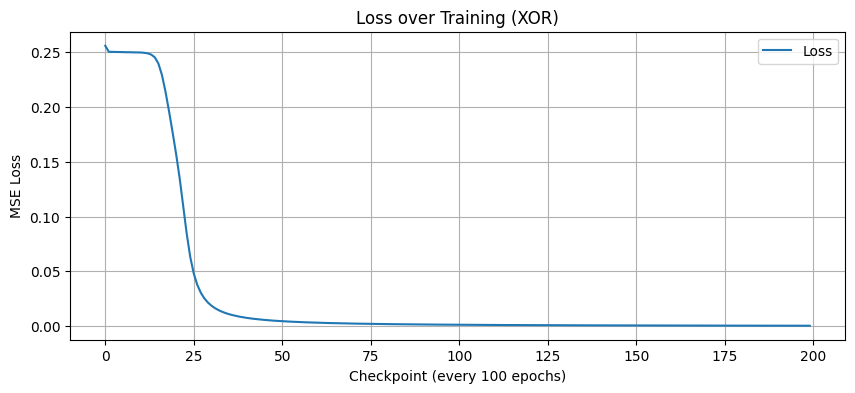

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(loss_history, label='Loss')
plt.title("Loss over Training (XOR)")
plt.xlabel("Checkpoint (every 100 epochs)")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.show()

# Optional: visualize weight evolution for 1st weight in w1 and w2

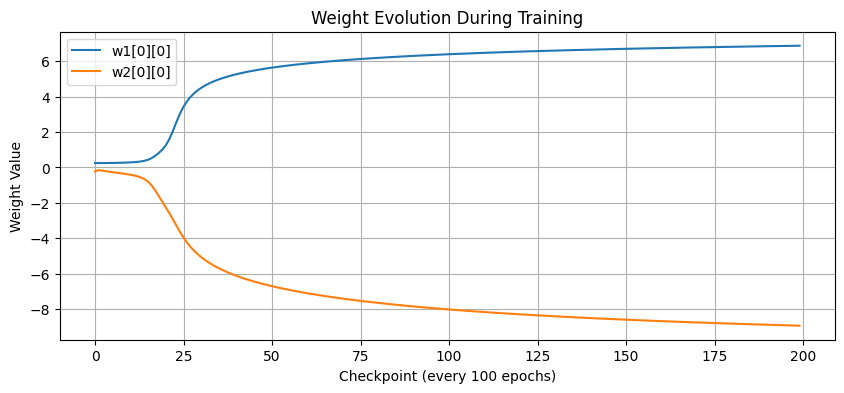

In [12]:
w1_first_weight = [w[0][0] for w in w1_snapshot]
w2_first_weight = [w[0][0] for w in w2_snapshot]

plt.figure(figsize=(10, 4))
plt.plot(w1_first_weight, label='w1[0][0]')
plt.plot(w2_first_weight, label='w2[0][0]')
plt.title("Weight Evolution During Training")
plt.xlabel("Checkpoint (every 100 epochs)")
plt.ylabel("Weight Value")
plt.grid(True)
plt.legend()

plt.show()